In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv(os.getcwd()+"\..\\belajar_pandas\insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


ketika kita ingin membuat scatter biasa tanpa menggunakan seaborn maka ini yang terjadi
dengan membuat scatter satu persatu. Contoh dibawah adalah kita membuat scatter plot dengan menumpuk scatter 2 ke scatter 1

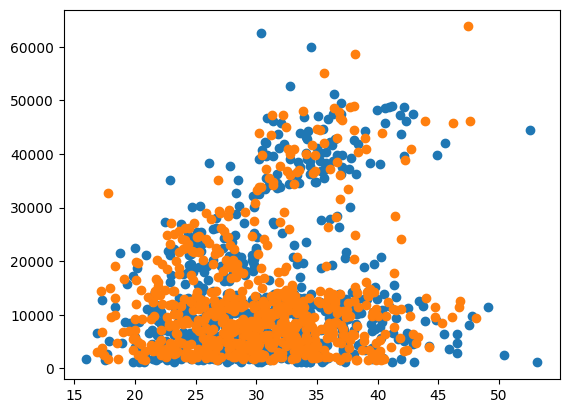

In [3]:
dfO = df[df.sex == "male"]
dfT = df[df.sex == "female"]
plt.scatter(dfO.bmi, dfO.charges)
plt.scatter(dfT.bmi, dfT.charges)

Tetapi jika kita menggunakan seaborn maka hal ini akan dipersingkat menjadi lebih pendek yakni dengan satu baris saja sudah cukup dan bahkan lebih baik untuk tampilan grafiknya

untuk parameternya itu (nilai_x(berasal dari atribut df), nilai_y(berasal dari atribut df), data=dataframe_anda, hue=pembeda_pelabelan_berdasarkan_atribut)

<Axes: xlabel='bmi', ylabel='charges'>

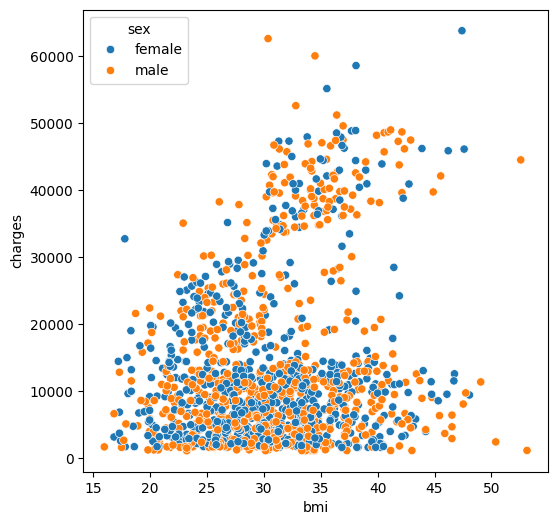

In [4]:
plt.figure(figsize=(6,6))  # optional
sns.scatterplot(x="bmi", y="charges", data=df, hue="sex")

dan juga bisa menentukan untuk linear regresi diantara masing2 kategori. Walaupun untuk kombinasi x dan y ini tidak cocok untuk pengembangan linear regression

<Figure size 600x600 with 0 Axes>

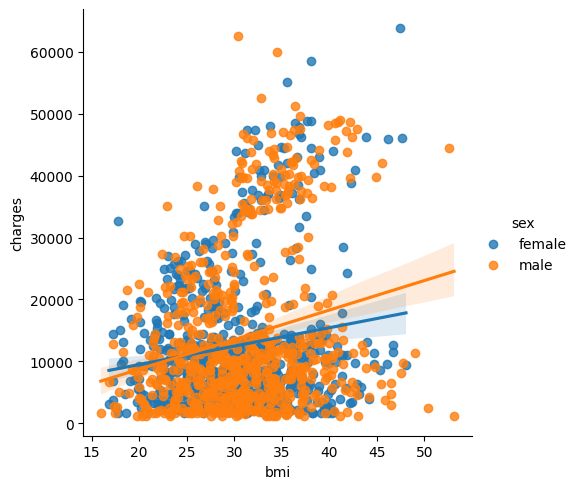

In [5]:
plt.figure(figsize=(6,6))  # optional
sns.lmplot(x="bmi", y="charges", data=df, hue="sex")

kita juga dapat membuat histogram dengan menggunakan seaboarn

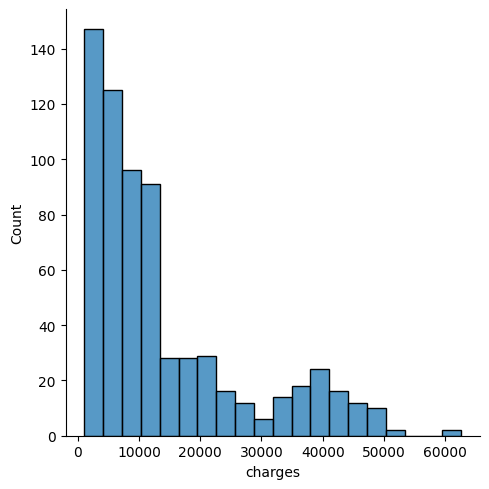

In [6]:
sns.displot(dfO.charges, bins=20)

<Axes: >

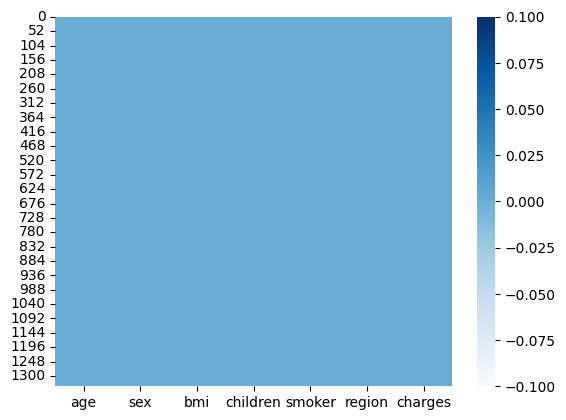

In [7]:
sns.heatmap(df.isna(),cmap="Blues")

In [8]:
new_df = pd.read_csv(os.getcwd() + "\insurance.csv")

new_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,NaN,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


In [9]:
new_df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


Cara menemukan data yang kosong dengan melalui grafik

<Axes: >

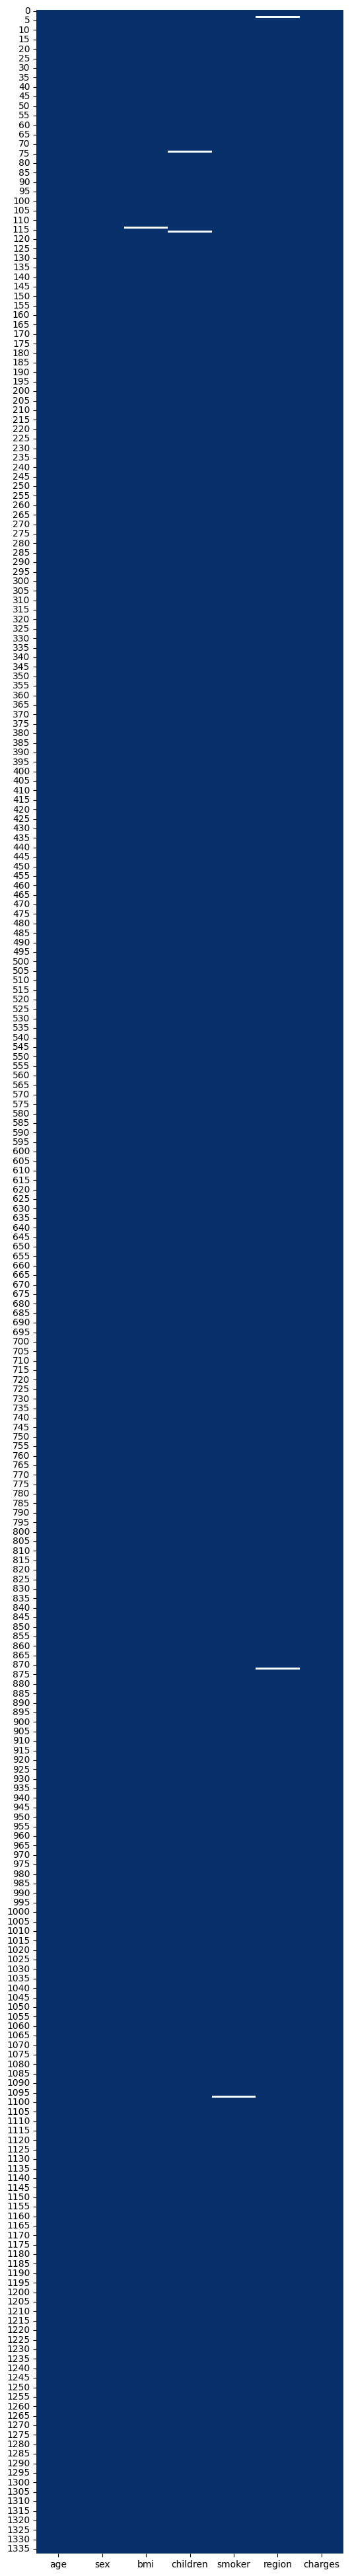

In [10]:
plt.figure(figsize=(6, 50))
sns.heatmap(~new_df.isna(), cmap="Blues", cbar=False)
# sns.heatmap(new_df.isna(), cmap="Blues")

In [11]:
new_df.isna().sum()

age         0
sex         0
bmi         1
children    2
smoker      1
region      2
charges     0
dtype: int64

correlation chart, yakni hubungan antara kolom satu dengan kolom lainnya

In [12]:
df['region'] = df.region.map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})
df['sex'] = df.region.map({'male': 0, 'female': 1})
df['smoker'] = df.region.map({'no': 0, 'yes': 1})

In [13]:
new_df['region'] = new_df.region.map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})
new_df['sex'] = new_df.region.map({'male': 0, 'female': 1})
new_df['smoker'] = new_df.region.map({'no': 0, 'yes': 1})

untuk parameternya, cmap => warna, annot => angka_setiap_kotak, vmin => nilai_minimal, vmax => nilai_maximal, cbar => penanda_value_sesuai_warna, square => menentukan_apakah_framnenya_itu_persegi_atau_tidak, fmt => untuk menentukan berapa digit angka dibelakang koma

<Axes: >

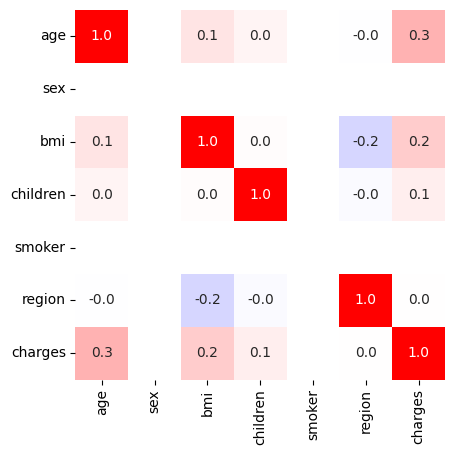

In [14]:
sns.heatmap(new_df.corr(), cmap="bwr", annot=True, vmin=-1, vmax=1, cbar=False, square=True, fmt=".1f")

<Axes: >

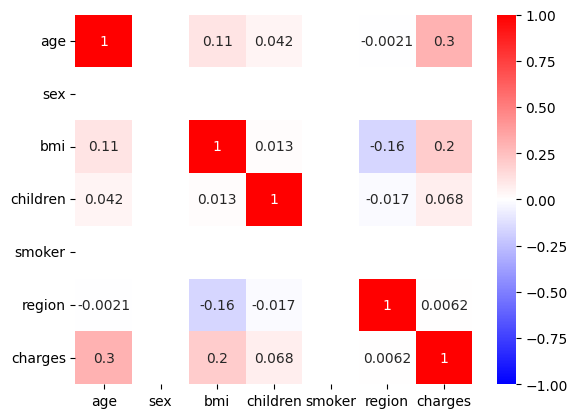

In [15]:
sns.heatmap(df.corr(), cmap="bwr", annot=True, vmin=-1, vmax=1)

cara untuk menampilkan beeberapa grafik dalam satu frame yang sama

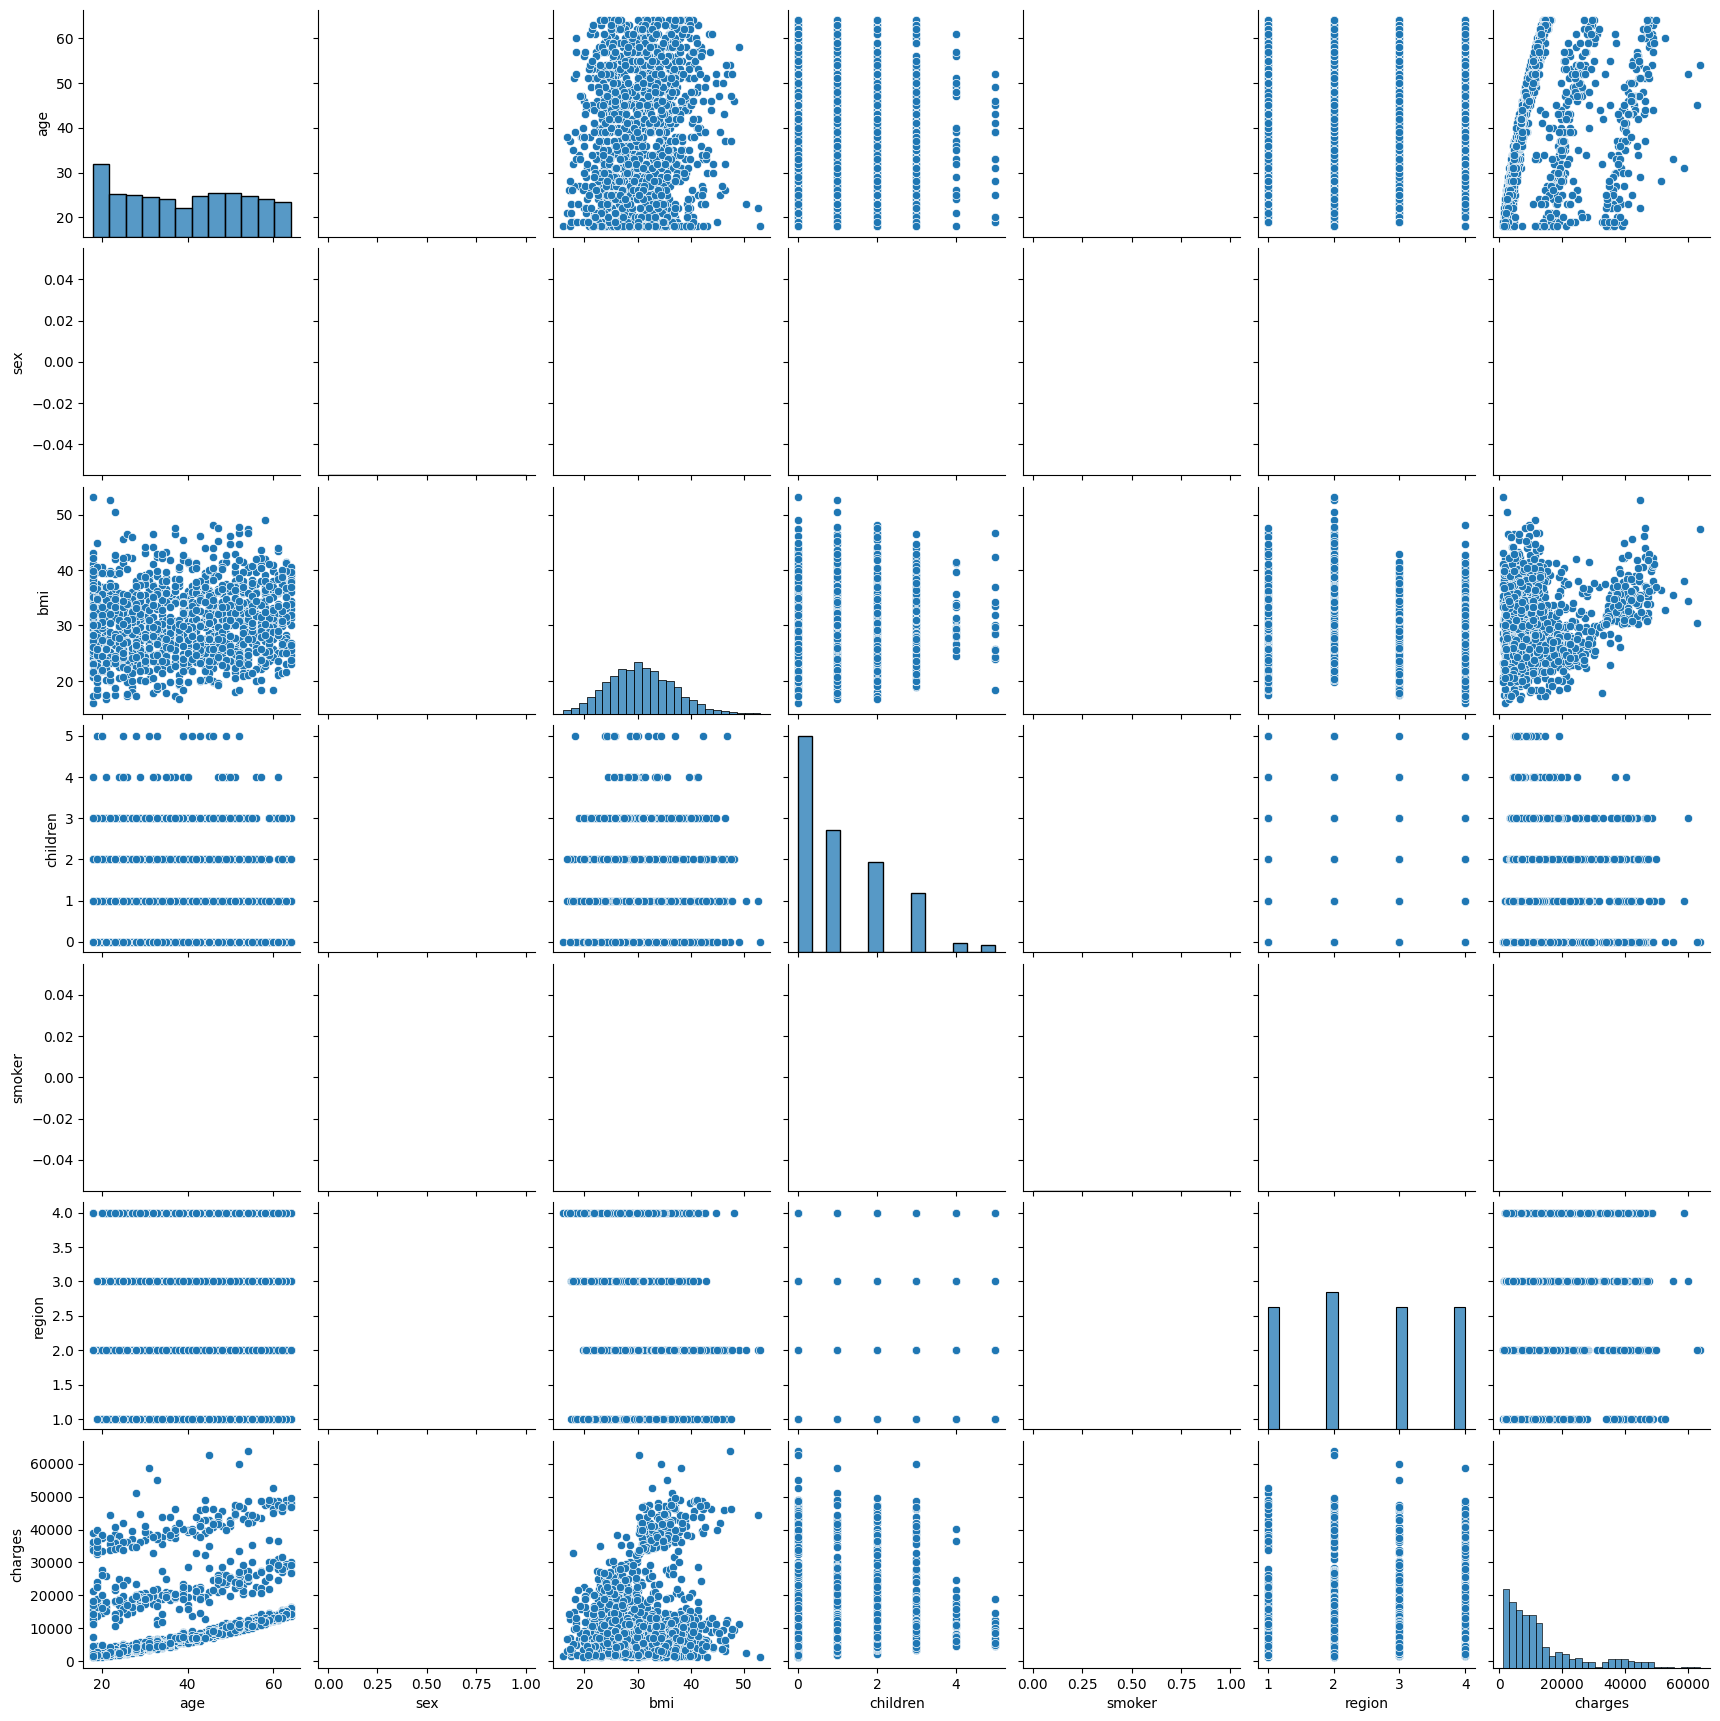

In [16]:
sns.pairplot(df)

In [17]:
pure_df = pd.read_csv(os.getcwd()+"\..\\belajar_pandas\insurance.csv")

In [18]:
pure_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

kita bisa membuat agar hue / perbedaan warna berdasarkan dari value region, lalu untuk variabel vars => digunakan untuk menyaring atribut apa saja yang ingin kita tampilkan

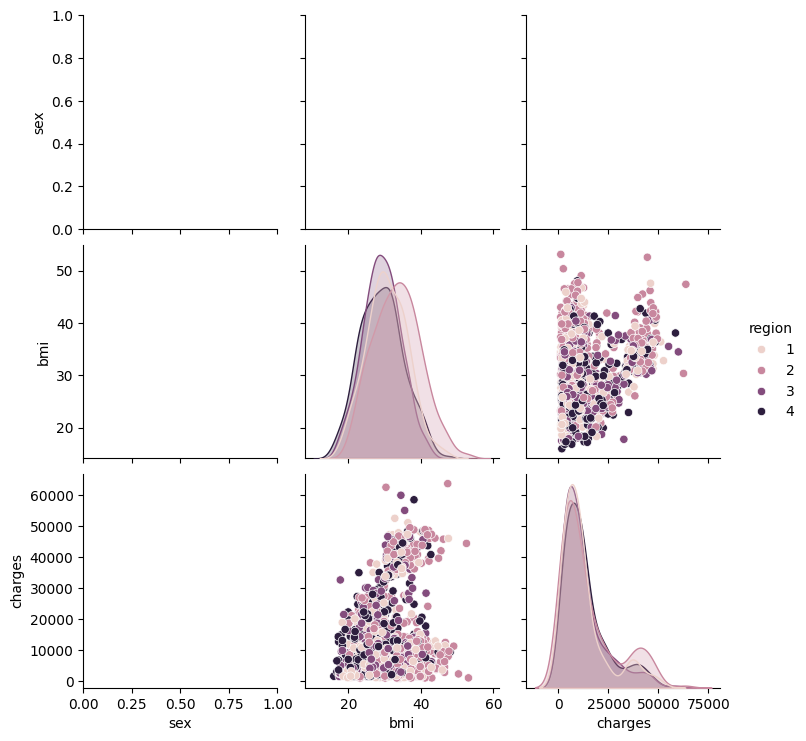

In [19]:
sns.pairplot(df, hue="region", vars=["sex", "bmi", "charges"])

menambahkan regresi nya juga

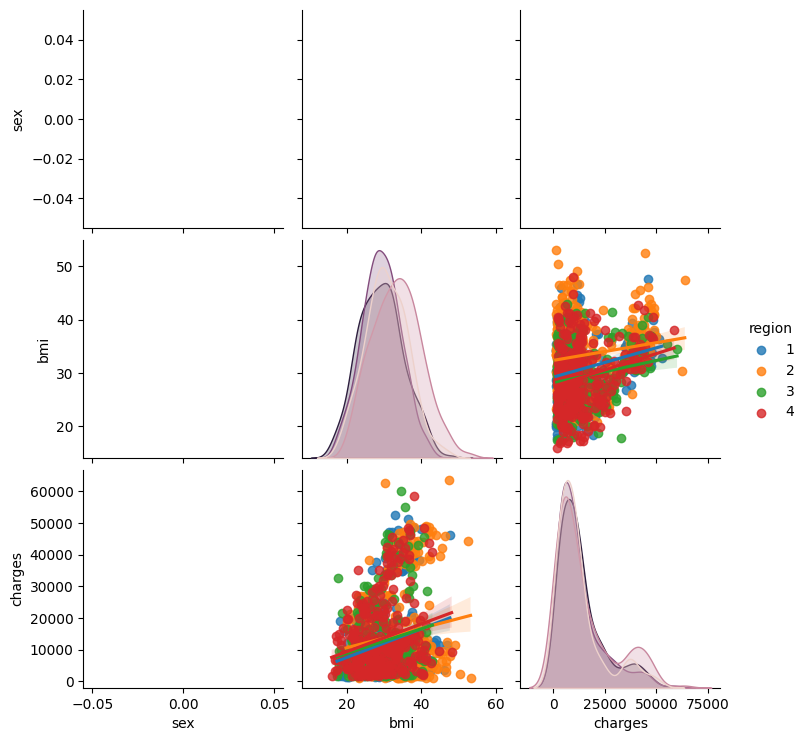

In [20]:
sns.pairplot(df, hue="region", vars=["sex", "bmi", "charges"], kind="reg")

membuat join plot

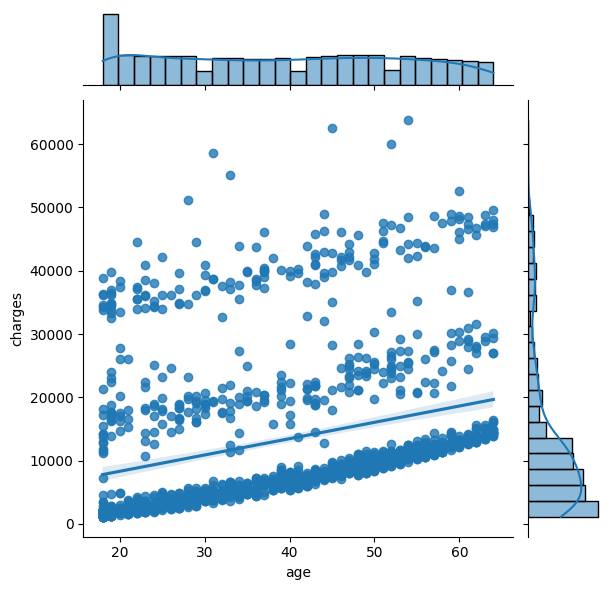

In [21]:
sns.jointplot(x="age", y="charges", data=df, marginal_kws={"bins": 25}, kind="reg")

Categorical Data, persebaran

catplot


<Figure size 1200x600 with 0 Axes>

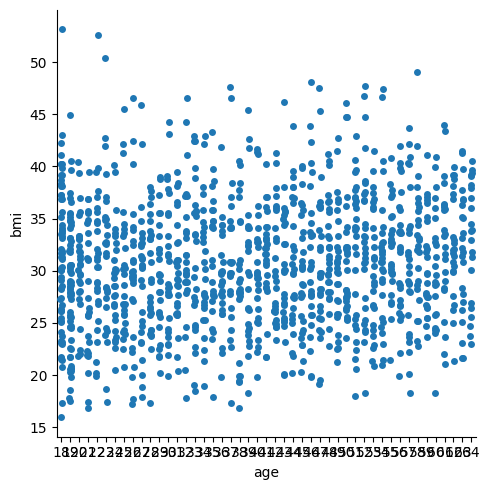

In [22]:
plt.figure(figsize=(12, 6))
sns.catplot(data=df, x="age", y="bmi")

boxplot

<Axes: xlabel='age', ylabel='bmi'>

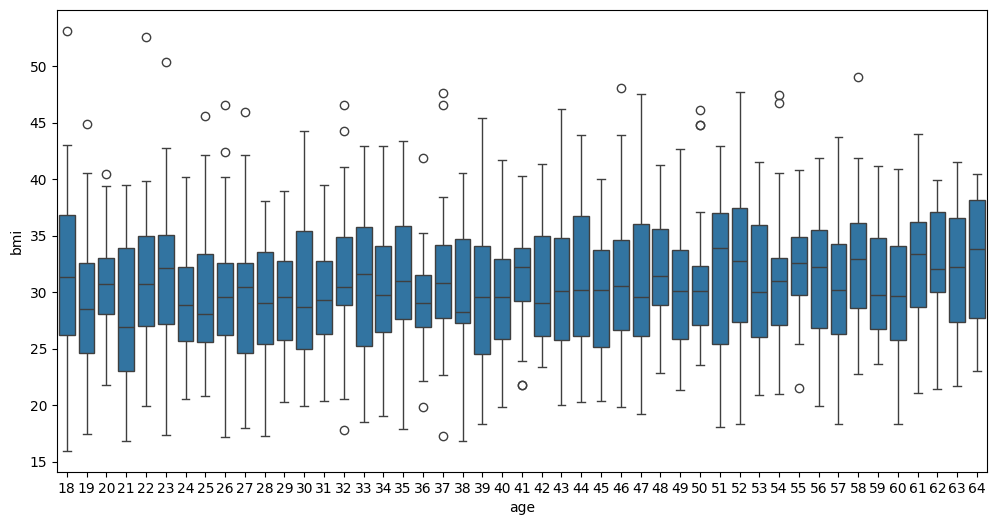

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="age", y="bmi", data=df)

violinplot

<Axes: xlabel='age', ylabel='bmi'>

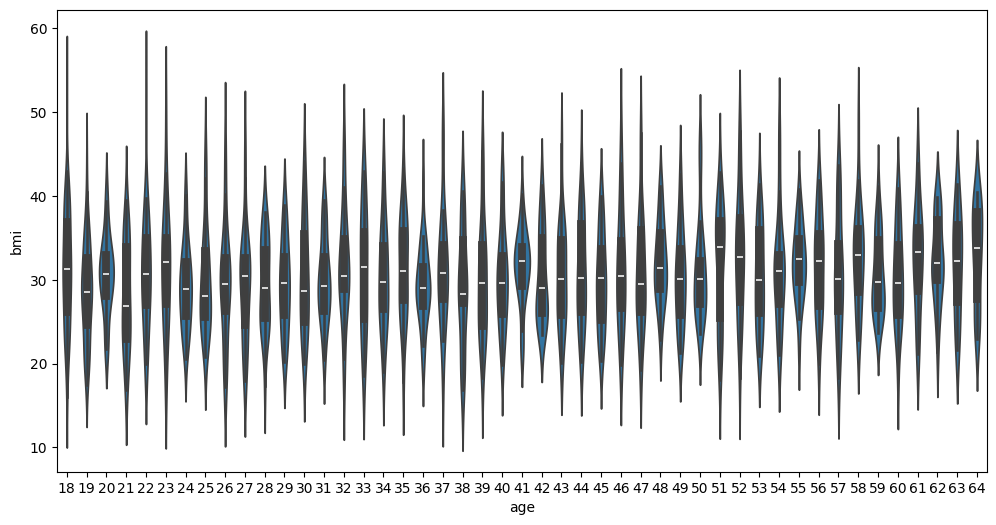

In [24]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="age", y="bmi", data=df)

Count, membuat tabel yang menghitungkan berapa jumlah unique tersebut

<Figure size 2600x600 with 0 Axes>

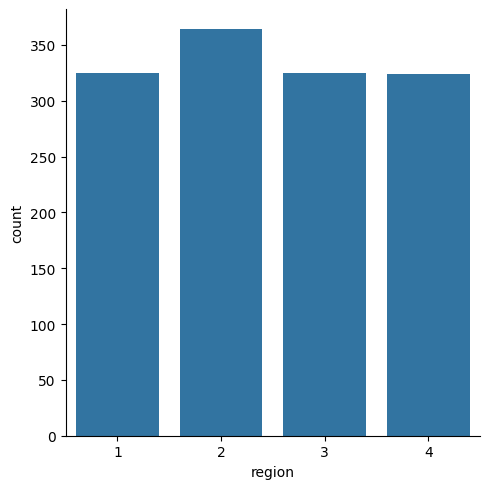

In [25]:
plt.figure(figsize=(26, 6))
sns.catplot(x="region", data=df, kind="count")

<Axes: xlabel='bmi', ylabel='count'>

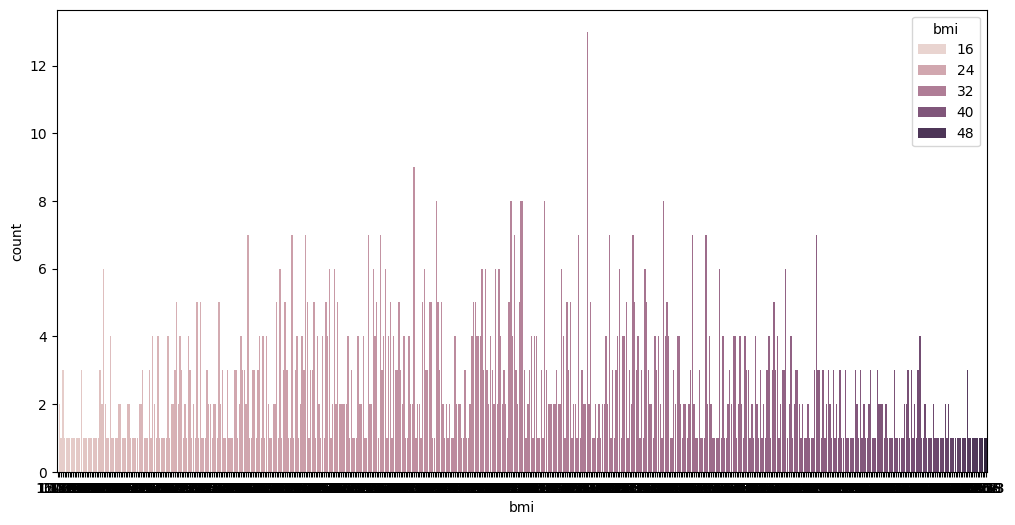

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x="bmi", data=df, hue="bmi")